# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from pandas import option_context
wr.filterwarnings('ignore')

# Data Import

In [2]:
genetics_train = pd.read_csv("genetics_train.csv")
genetics_train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [3]:
genetics_test = pd.read_csv("genetics_test.csv")
genetics_test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


# DATA PREPROCESSING

# Checking description of features to investigate their relevance

In [4]:
info_dict = {'Patient id' : 'Represents the unique identification number of a patient',
'Patient Age': 'Represents the age of a patient',
"Genes in mother's side": "Represents a gene defect in a patient's mother",
"Inherited from father": "Represents a gene defect in a patient's father",
"Maternal gene": "Represents a gene defect in patient's maternal side of the family",
"Paternal gene": "Represents a gene defect in patient's paternal side of the family",
"Blood cell count (mcL)": "Represents the blood cell count of a patient",
"Patient First Name": "Represents a patient's first name",
"Family Name": "Represents a patient's family name or surname",
"Father's name": "Represents a patient's father name",
"Mother's age": "Represents a patient's mother's age",
"Father's age": "Represents a patient's father's age",
"Institute name": "Represents the medical institute where a patitent was born",
"Location of Institute": "Represents the location of the medical institute",
"Status": "Represents whether a patient is deceased",
"Respiratory Rate (breath/min)": "Represents a patient's respiratory breathing rate",
"Heart Rate (rate/min)": "Represents a patient's heart rate",
"Test 1 - Test 5": "Represents different (masked) tests that where conducted on a patient",
"Parental consent": "Represents whether a patient's parents approved the treatmen plan",
"Follow_up": "Represents a patient's level of risk (how intense their condition is)",
"Gender": "Represents a patient's gender",
"Birth asphyxia": "Represents whether a patients suffered from birth asphyxia",
"Autopsy shows birth defect (if applicable)": "Represents whether a patient's autopsy showed any birth defects",
"Place of birth": "Represents whether a patient was born in a medical institute or home",
"Folic acid details (periconeptional)": "Represents the preconceptional folic acid supplementation details of a patient",
"H/O serious maternal illness": "Represents an unexpected outcome of labor and delivery that resulted in significant short or long-term consequences to a patient's mother",
"H/O radiation exposure (x-ray)": "Represents whether a patients has any radiation exposure history",
"H/O substance abuse": "Represents whether a pparent has a history of drug addiction",
"Assisted conception IVR/ART": "Represents the type of treatment for infertility",
"History of anomalies in previous pregnancies": "Represents whether the mother had any anomalies in her previous pregnancies",
"No. of previous abortions": "Represents the number of abortions that a mother had",
"Birth defects": "Represents whether a patient has a birth defects",
"White Blood cell count (thousand per microliter)": "Represents a petient's white blood cell count",
"Blood test result": "Represents a petient's blood test results",
"Symptom 1 - Symptom 5": "Represents (masked) different types of symptoms that a patient had",
"Genetic Disorder": "Represents the genetic disorder that a patient has",
"Disorder Subclass": "Represents the subclass of the disorder"}

In [5]:
attributes_df = pd.DataFrame.from_dict(info_dict, orient ='index').style.set_properties(**{'text-align': 'left'})
attributes_df

,0
Patient id,Represents the unique identification number of a patient
Patient Age,Represents the age of a patient
Genes in mother's side,Represents a gene defect in a patient's mother
Inherited from father,Represents a gene defect in a patient's father
Maternal gene,Represents a gene defect in patient's maternal side of the family
Paternal gene,Represents a gene defect in patient's paternal side of the family
Blood cell count (mcL),Represents the blood cell count of a patient
Patient First Name,Represents a patient's first name
Family Name,Represents a patient's family name or surname
Father's name,Represents a patient's father name


We need to drop some columns since they hold irrelevanrt information from perspective of genetic disorders.

In [6]:
# dropping irrelevant columns from train set

genetics_train.drop(['Patient Id','Patient First Name','Family Name',"Father's name",'Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4','Test 5','Place of birth','H/O serious maternal illness','Parental consent'], axis=1, inplace=True)
genetics_train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [7]:
# dropping irrelevant columns from test set

genetics_test.drop(['Patient Id','Patient First Name','Family Name',"Father's name",'Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4','Test 5','Place of birth','H/O serious maternal illness', 'Parental consent'], axis=1, inplace=True)
genetics_test.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6,No,Yes,No,No,4.981655,38,61,Alive,Tachypnea,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,10,Yes,No,NaN,Yes,5.118890,33,53,Alive,NaN,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,5,No,NaN,No,No,4.876204,48,60,Deceased,NaN,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,13,No,Yes,Yes,No,4.687767,25,55,Alive,-99,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,5,No,NaN,NaN,Yes,5.152362,41,38,Deceased,Tachypnea,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


In [8]:
# renaiming columns in train set

genetics_train.rename(columns={'Patient Age':'Patient_age',
                     "Genes in mother's side":'Genes_mother_side',
                     'Inherited from father':'Inherited_father',
                     'Maternal gene':'Maternal_gene',
                     'Paternal gene':'Paternal_gene',
                     'Blood cell count (mcL)':'Blood_cell_count',
                     "Mother's age":"Mothers_age",
                     "Father's age": 'Fathers_age',
                     'Respiratory Rate (breaths/min)': 'Respiratory_rate',
                     'Heart Rate (rates/min': 'Heart_rate',
                     'Follow-up': 'Follow_up',
                     'Birth asphyxia': 'Birth_asphyxia',
                     'Autopsy shows birth defect (if applicable)': 'Autopsy_birth_defect',
                     'Folic acid details (peri-conceptional)': 'Folic_acid',
                     'H/O radiation exposure (x-ray)': 'Radiation_exposure',
                     'H/O substance abuse': 'Substance_abuse',
                     'Assisted conception IVF/ART':'Assisted_conception',
                     'History of anomalies in previous pregnancies': 'History_previous_pregnancies',
                     'No. of previous abortion': 'Previous_abortions',
                     'Birth defects': 'Birth_defects',
                     'White Blood cell count (thousand per microliter)': 'White_blood_cell_count',
                     'Blood test result': 'Blood_test',
                     'Symptom 1': 'Symptom_1',
                     'Symptom 2': 'Symptom_2',
                     'Symptom 3': 'Symptom_3',
                     'Symptom 4': 'Symptom_4',
                     'Symptom 5': 'Symptom_5',
                     'Genetic Disorder': 'Genetic_disorder',
                     'Disorder Subclass' : 'Disorder_subclass'},
                      inplace=True)

In [9]:
# renaiming columns in test set

genetics_test.rename(columns={'Patient Age':'Patient_age',
                     "Genes in mother's side":'Genes_mother_side',
                     'Inherited from father':'Inherited_father',
                     'Maternal gene':'Maternal_gene',
                     'Paternal gene':'Paternal_gene',
                     'Blood cell count (mcL)':'Blood_cell_count',
                     "Mother's age":"Mothers_age",
                     "Father's age": 'Fathers_age',
                     'Respiratory Rate (breaths/min)': 'Respiratory_rate',
                     'Heart Rate (rates/min': 'Heart_rate',
                     'Follow-up': 'Follow_up',
                     'Birth asphyxia': 'Birth_asphyxia',
                     'Autopsy shows birth defect (if applicable)': 'Autopsy_birth_defect',
                     'Folic acid details (peri-conceptional)': 'Folic_acid',
                     'H/O radiation exposure (x-ray)': 'Radiation_exposure',
                     'H/O substance abuse': 'Substance_abuse',
                     'Assisted conception IVF/ART':'Assisted_conception',
                     'History of anomalies in previous pregnancies': 'History_previous_pregnancies',
                     'No. of previous abortion': 'Previous_abortions',
                     'Birth defects': 'Birth_defects',
                     'White Blood cell count (thousand per microliter)': 'White_blood_cell_count',
                     'Blood test result': 'Blood_test',
                     'Symptom 1': 'Symptom_1',
                     'Symptom 2': 'Symptom_2',
                     'Symptom 3': 'Symptom_3',
                     'Symptom 4': 'Symptom_4',
                     'Symptom 5': 'Symptom_5'                    
                     },
                      inplace=True)

# Values check

In [10]:
genetics_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_age                   20656 non-null  float64
 1   Genes_mother_side             22083 non-null  object 
 2   Inherited_father              21777 non-null  object 
 3   Maternal_gene                 19273 non-null  object 
 4   Paternal_gene                 22083 non-null  object 
 5   Blood_cell_count              22083 non-null  float64
 6   Mothers_age                   16047 non-null  float64
 7   Fathers_age                   16097 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_rate              19934 non-null  object 
 10  Heart_rate                    19970 non-null  object 
 11  Follow_up                     19917 non-null  object 
 12  Gender                        19910 non-null  object 
 13  B

In [11]:
genetics_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_age                   9465 non-null   int64  
 1   Genes_mother_side             9465 non-null   object 
 2   Inherited_father              8914 non-null   object 
 3   Maternal_gene                 5742 non-null   object 
 4   Paternal_gene                 9465 non-null   object 
 5   Blood_cell_count              9465 non-null   float64
 6   Mothers_age                   9465 non-null   int64  
 7   Fathers_age                   9465 non-null   int64  
 8   Status                        9465 non-null   object 
 9   Respiratory_rate              6579 non-null   object 
 10  Heart_rate                    6565 non-null   object 
 11  Follow_up                     9465 non-null   object 
 12  Gender                        9465 non-null   object 
 13  Bir

In [12]:
# checking values in train set

for col in genetics_train.columns:
    print('\n',col)
    print(genetics_train[col].unique())
    print('----------------------')


 Patient_age
[ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
----------------------

 Genes_mother_side
['Yes' 'No']
----------------------

 Inherited_father
['No' 'Yes' nan]
----------------------

 Maternal_gene
['Yes' 'No' nan]
----------------------

 Paternal_gene
['No' 'Yes']
----------------------

 Blood_cell_count
[4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
----------------------

 Mothers_age
[nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
----------------------

 Fathers_age
[nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 32. 41. 52.
 28. 31. 61. 35. 49. 50. 29. 64. 39. 34. 51. 25. 60. 53. 58. 26. 27. 59.
 47. 38. 54. 21. 37. 36. 33. 46. 40. 45.]
----------------------

 Status
['Alive' 'Deceased']
----------------------

 Respiratory_rate
['Normal (30-60)' 'Tachypnea' nan]
----------------------

 Heart_rate
['Normal' 'T

There are some rows in Birth_asphyxia, Autopsy_birth_defect, Radiation_exposure and Substance_abuse columns that need to be replaced with NaN. 

In [13]:
# replacing with NaN in train set

genetics_train['Birth_asphyxia'] = genetics_train['Birth_asphyxia'].replace(['No record','Not available'], np.NaN)
genetics_train['Autopsy_birth_defect'] = genetics_train['Autopsy_birth_defect'].replace(['Not applicable','None'], np.NaN)
genetics_train['Radiation_exposure'] = genetics_train['Radiation_exposure'].replace(['-','Not applicable'], np.NaN)
genetics_train['Substance_abuse'] = genetics_train['Substance_abuse'].replace(['-','Not applicable'], np.NaN)

In [14]:
# checking values in test set

for col in genetics_test.columns:
    print('\n',col)
    print(genetics_test[col].unique())
    print('----------------------')


 Patient_age
[ 6 10  5 13  9  4 12  3  1  0 14  8  2 11  7]
----------------------

 Genes_mother_side
['No' 'Yes']
----------------------

 Inherited_father
['Yes' 'No' nan]
----------------------

 Maternal_gene
['No' nan 'Yes']
----------------------

 Paternal_gene
['No' 'Yes']
----------------------

 Blood_cell_count
[4.98165485 5.11888952 4.87620391 ... 4.89835233 4.80483966 5.42123643]
----------------------

 Mothers_age
[38 33 48 25 41 27 19 37 28 39 49 40 22 21 46 24 30 47 20 42 35 36 51 50
 45 34 44 43 32 26 31 18 23 29]
----------------------

 Fathers_age
[61 53 60 55 38 25 22 24 51 56 23 48 33 37 45 62 64 36 58 43 27 46 50 30
 40 26 47 44 49 63 39 21 41 29 20 54 31 52 59 57 42 35 28 34 32]
----------------------

 Status
['Alive' 'Deceased']
----------------------

 Respiratory_rate
['Tachypnea' nan '-99' 'Normal (30-60)']
----------------------

 Heart_rate
['Normal' '-99' nan 'Tachycardia']
----------------------

 Follow_up
['Low' 'High' '-99']
----------------------

'-99' is appearnig in lot of columns. This need to be replaced with NaN.

In [15]:
# replacing with NaN in test set

genetics_test['Birth_asphyxia'] = genetics_test['Birth_asphyxia'].replace(['No record','Not available','-99'], np.NaN)
genetics_test['Autopsy_birth_defect'] = genetics_test['Autopsy_birth_defect'].replace(['Not applicable','None','-99'], np.NaN)
genetics_test['Radiation_exposure'] = genetics_test['Radiation_exposure'].replace(['-','Not applicable','-99'], np.NaN)
genetics_test['Substance_abuse'] = genetics_test['Substance_abuse'].replace(['-','Not applicable','-99'], np.NaN)
genetics_test['Respiratory_rate'] = genetics_test['Respiratory_rate'].replace('-99',np.NaN)
genetics_test['Heart_rate'] = genetics_test['Heart_rate'].replace('-99',np.NaN)
genetics_test['White_blood_cell_count'] = genetics_test['White_blood_cell_count'].replace(-99.000000,np.NaN)
genetics_test['Follow_up'] = genetics_test['Follow_up'].replace('-99',np.NaN)
genetics_test['Gender'] = genetics_test['Gender'].replace('-99',np.NaN)
genetics_test['Folic_acid'] = genetics_test['Folic_acid'].replace('-99',np.NaN)
genetics_test['Previous_abortions'] = genetics_test['Previous_abortions'].replace(-99,np.NaN)
genetics_test['Assisted_conception'] = genetics_test['Assisted_conception'].replace('-99',np.NaN)
genetics_test['History_previous_pregnancies'] = genetics_test['History_previous_pregnancies'].replace('-99',np.NaN)
genetics_test['Birth_defects'] = genetics_test['Birth_defects'].replace('-99',np.NaN)
genetics_test['Blood_test'] = genetics_test['Blood_test'].replace('-99',np.NaN)

genetics_test[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']] = (genetics_test[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']] == True ).astype(int)

# NaN values check

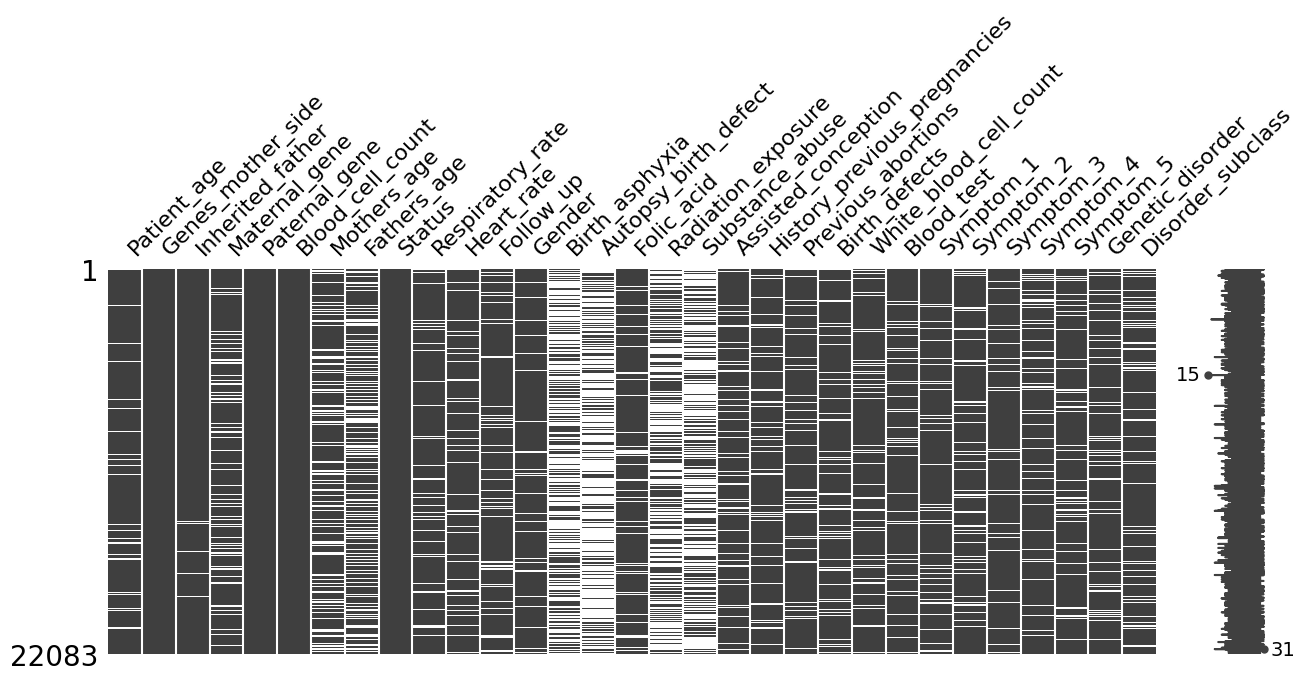

In [16]:
import missingno as msno

msno.matrix(genetics_train,figsize=(15,5))
plt.tight_layout()
plt.show()

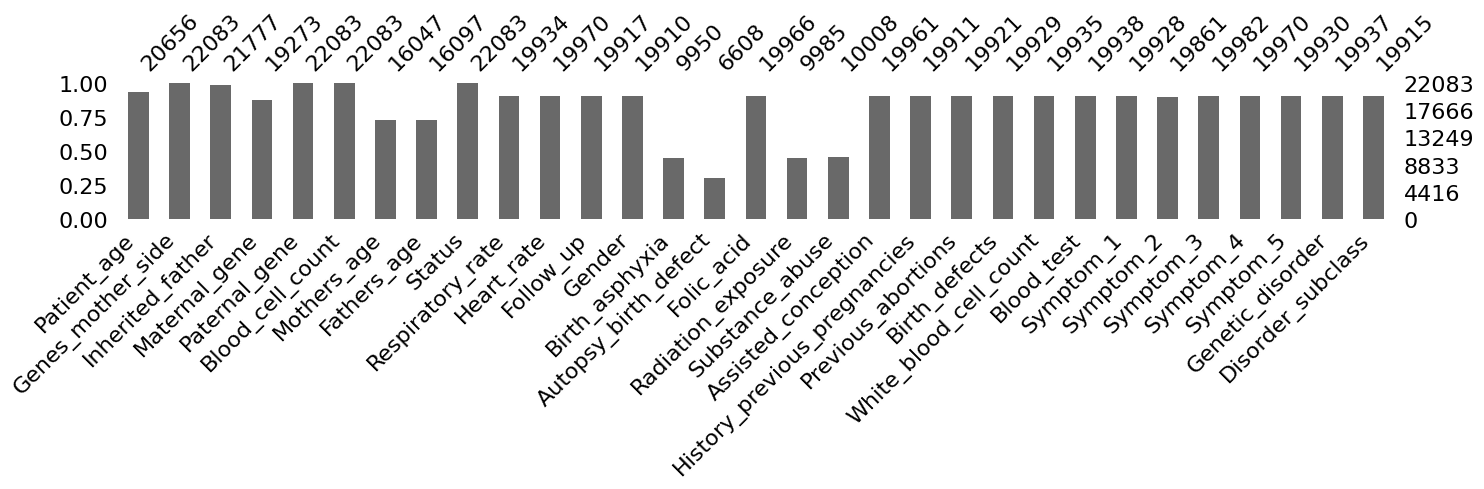

In [17]:
msno.bar(genetics_train,figsize=(15,5))
plt.tight_layout()
plt.show()

Birth_asphyxia, Autopsy_birth_defect, Radiation_exposure and Substance_abuse columns hold so many empty rows, that it is resonable to drop them in both train and test datasets.

In [18]:
# dropping Birth_asphyxia, Autopsy_birth_defect, Radiation_exposure and Substance_abuse columns in both sets

genetics_train.drop(['Birth_asphyxia','Autopsy_birth_defect','Radiation_exposure','Substance_abuse'], axis=1, inplace=True)
genetics_test.drop(['Birth_asphyxia','Autopsy_birth_defect','Radiation_exposure','Substance_abuse'], axis=1, inplace=True)

In [19]:
# sum of nan values in train set per column

genetics_train.isnull().sum()

Patient_age                     1427
Genes_mother_side                  0
Inherited_father                 306
Maternal_gene                   2810
Paternal_gene                      0
Blood_cell_count                   0
Mothers_age                     6036
Fathers_age                     5986
Status                             0
Respiratory_rate                2149
Heart_rate                      2113
Follow_up                       2166
Gender                          2173
Folic_acid                      2117
Assisted_conception             2122
History_previous_pregnancies    2172
Previous_abortions              2162
Birth_defects                   2154
White_blood_cell_count          2148
Blood_test                      2145
Symptom_1                       2155
Symptom_2                       2222
Symptom_3                       2101
Symptom_4                       2113
Symptom_5                       2153
Genetic_disorder                2146
Disorder_subclass               2168
d

There are some empty rows in Genetic_disorder and Disorder_subclass columns. Since this columns are our target values, empty rows will be dropped.

In [20]:
# dropping empty rows from 'Genetic_disorder' and 'Disorder_subclass' columns

genetics_train.dropna(axis=0,subset=['Genetic_disorder', 'Disorder_subclass'], inplace=True)

In [21]:
genetics_train.isnull().sum()

Patient_age                     1060
Genes_mother_side                  0
Inherited_father                 220
Maternal_gene                   2071
Paternal_gene                      0
Blood_cell_count                   0
Mothers_age                     4457
Fathers_age                     4418
Status                             0
Respiratory_rate                1570
Heart_rate                      1528
Follow_up                       1575
Gender                          1573
Folic_acid                      1564
Assisted_conception             1590
History_previous_pregnancies    1614
Previous_abortions              1546
Birth_defects                   1565
White_blood_cell_count          1607
Blood_test                      1564
Symptom_1                       1578
Symptom_2                       1646
Symptom_3                       1530
Symptom_4                       1566
Symptom_5                       1613
Genetic_disorder                   0
Disorder_subclass                  0
d

Clearly there still are missing features. Missing values will be set to mean values for numerical features and most frequent value for categorical features.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = ['Patient_age','Blood_cell_count','Mothers_age','Fathers_age','Previous_abortions',
                    'White_blood_cell_count']

categorical_features =  ['Genes_mother_side','Inherited_father','Maternal_gene','Paternal_gene','Status','Respiratory_rate',
                         'Heart_rate','Follow_up','Gender','Folic_acid','Assisted_conception','History_previous_pregnancies',
                         'Birth_defects','Blood_test','Symptom_1', 'Symptom_2','Symptom_3', 'Symptom_4', 'Symptom_5']

target = ['Genetic_disorder','Disorder_subclass']


# numerical features preparation
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

# categorical features preparation
cat_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='most_frequent'))
])

# transformer 
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, numeric_features),
    ('categorical_preprocessing', cat_preparation, categorical_features)
])

imputed = pd.DataFrame(data_preparation.fit_transform(genetics_train), columns=genetics_train[numeric_features + categorical_features].columns)
genetics_train_transformed = pd.concat([imputed, genetics_train[target].reset_index()], axis=1)

genetics_test_transformed = pd.DataFrame(data_preparation.transform(genetics_test), columns=genetics_test[numeric_features + categorical_features].columns)

In [23]:
# setting numeric features back as integers

genetics_train_transformed[numeric_features] = genetics_train_transformed[numeric_features].astype(int)

# EDA

# Percentage of genetic disorder classes and cases of specific disorder subclasses

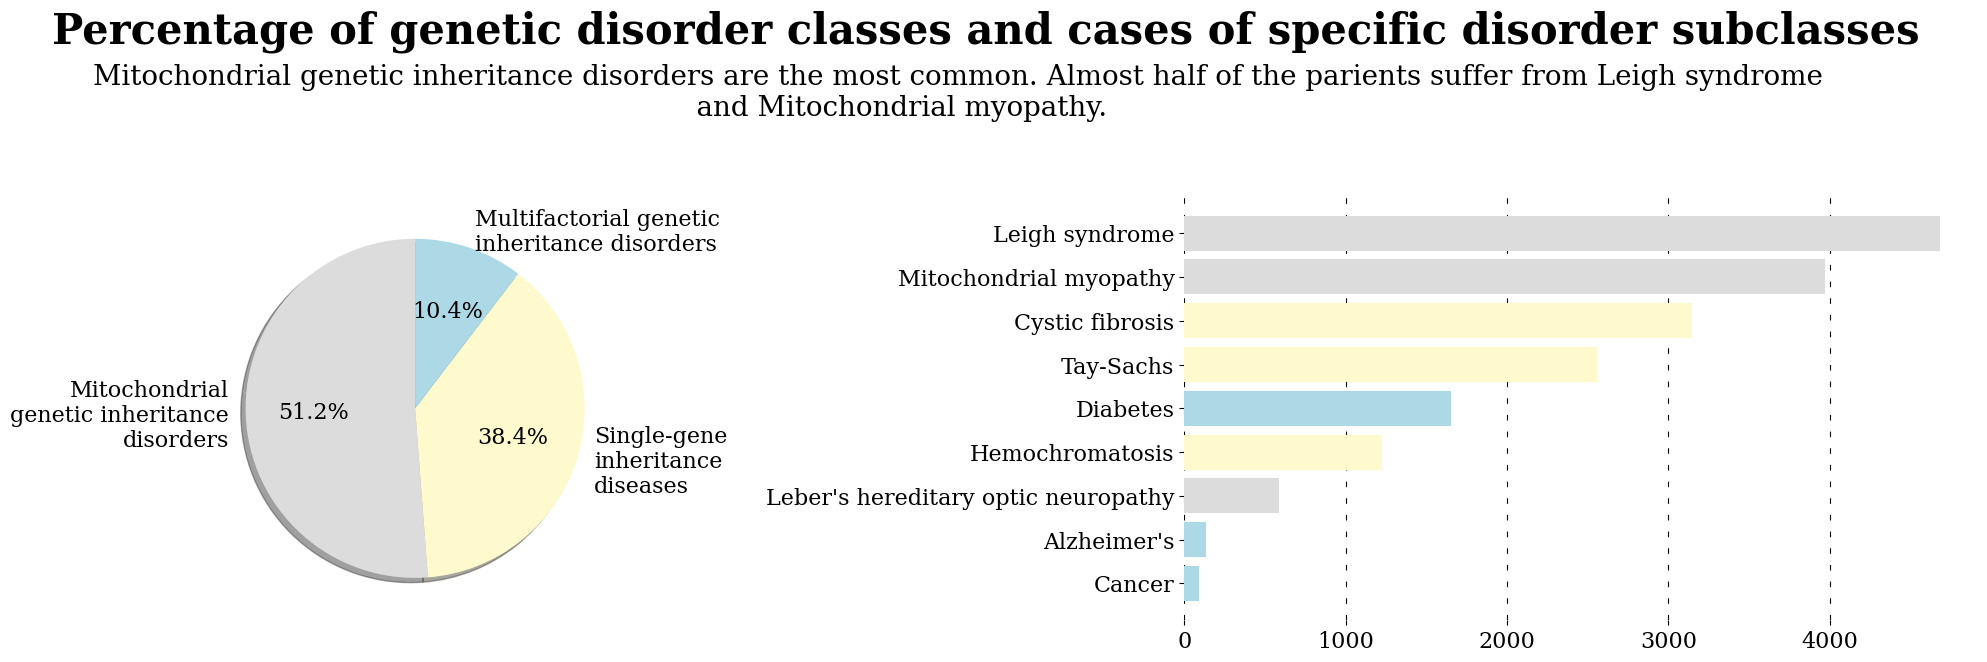

In [24]:
genetic_disorder=genetics_train_transformed['Genetic_disorder'].value_counts().reset_index()
genetic_disorder.columns=['disorder','count']
subclass=genetics_train_transformed['Disorder_subclass'].value_counts().reset_index()
subclass.columns=['subclass','count']


plt.rcParams['font.family'] = 'serif'
fig=plt.figure(figsize=(20,40),facecolor='white')
gs=fig.add_gridspec(8,2)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

colormap1=['Gainsboro','LemonChiffon','LightBlue']
colormap2=['Gainsboro','Gainsboro','LemonChiffon','LemonChiffon','LightBlue','LemonChiffon','Gainsboro','LightBlue','LightBlue']

fig.suptitle('Percentage of genetic disorder classes and cases of specific disorder subclasses \n\n\n\n', fontsize=30, fontweight='bold', ha='center')
fig.text(0.05,0.93,'Mitochondrial genetic inheritance disorders are the most common. Almost half of the parients suffer from Leigh syndrome\n\
                                                                    and Mitochondrial myopathy.\n\n\n',fontsize=20, fontfamily='serif')
ax0.pie(genetic_disorder['count'],labels=['Mitochondrial\ngenetic inheritance\ndisorders','Single-gene\ninheritance\ndiseases','Multifactorial genetic\ninheritance disorders'], autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap1, textprops={'fontsize': 16})

ax1.barh(subclass['subclass'], subclass['count'],color=colormap2, zorder=2)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.invert_yaxis()
ax1.grid(color='black', linestyle=':', axis='x', zorder=1,  dashes=(5,10))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

# Patients' status according to disorder subclass

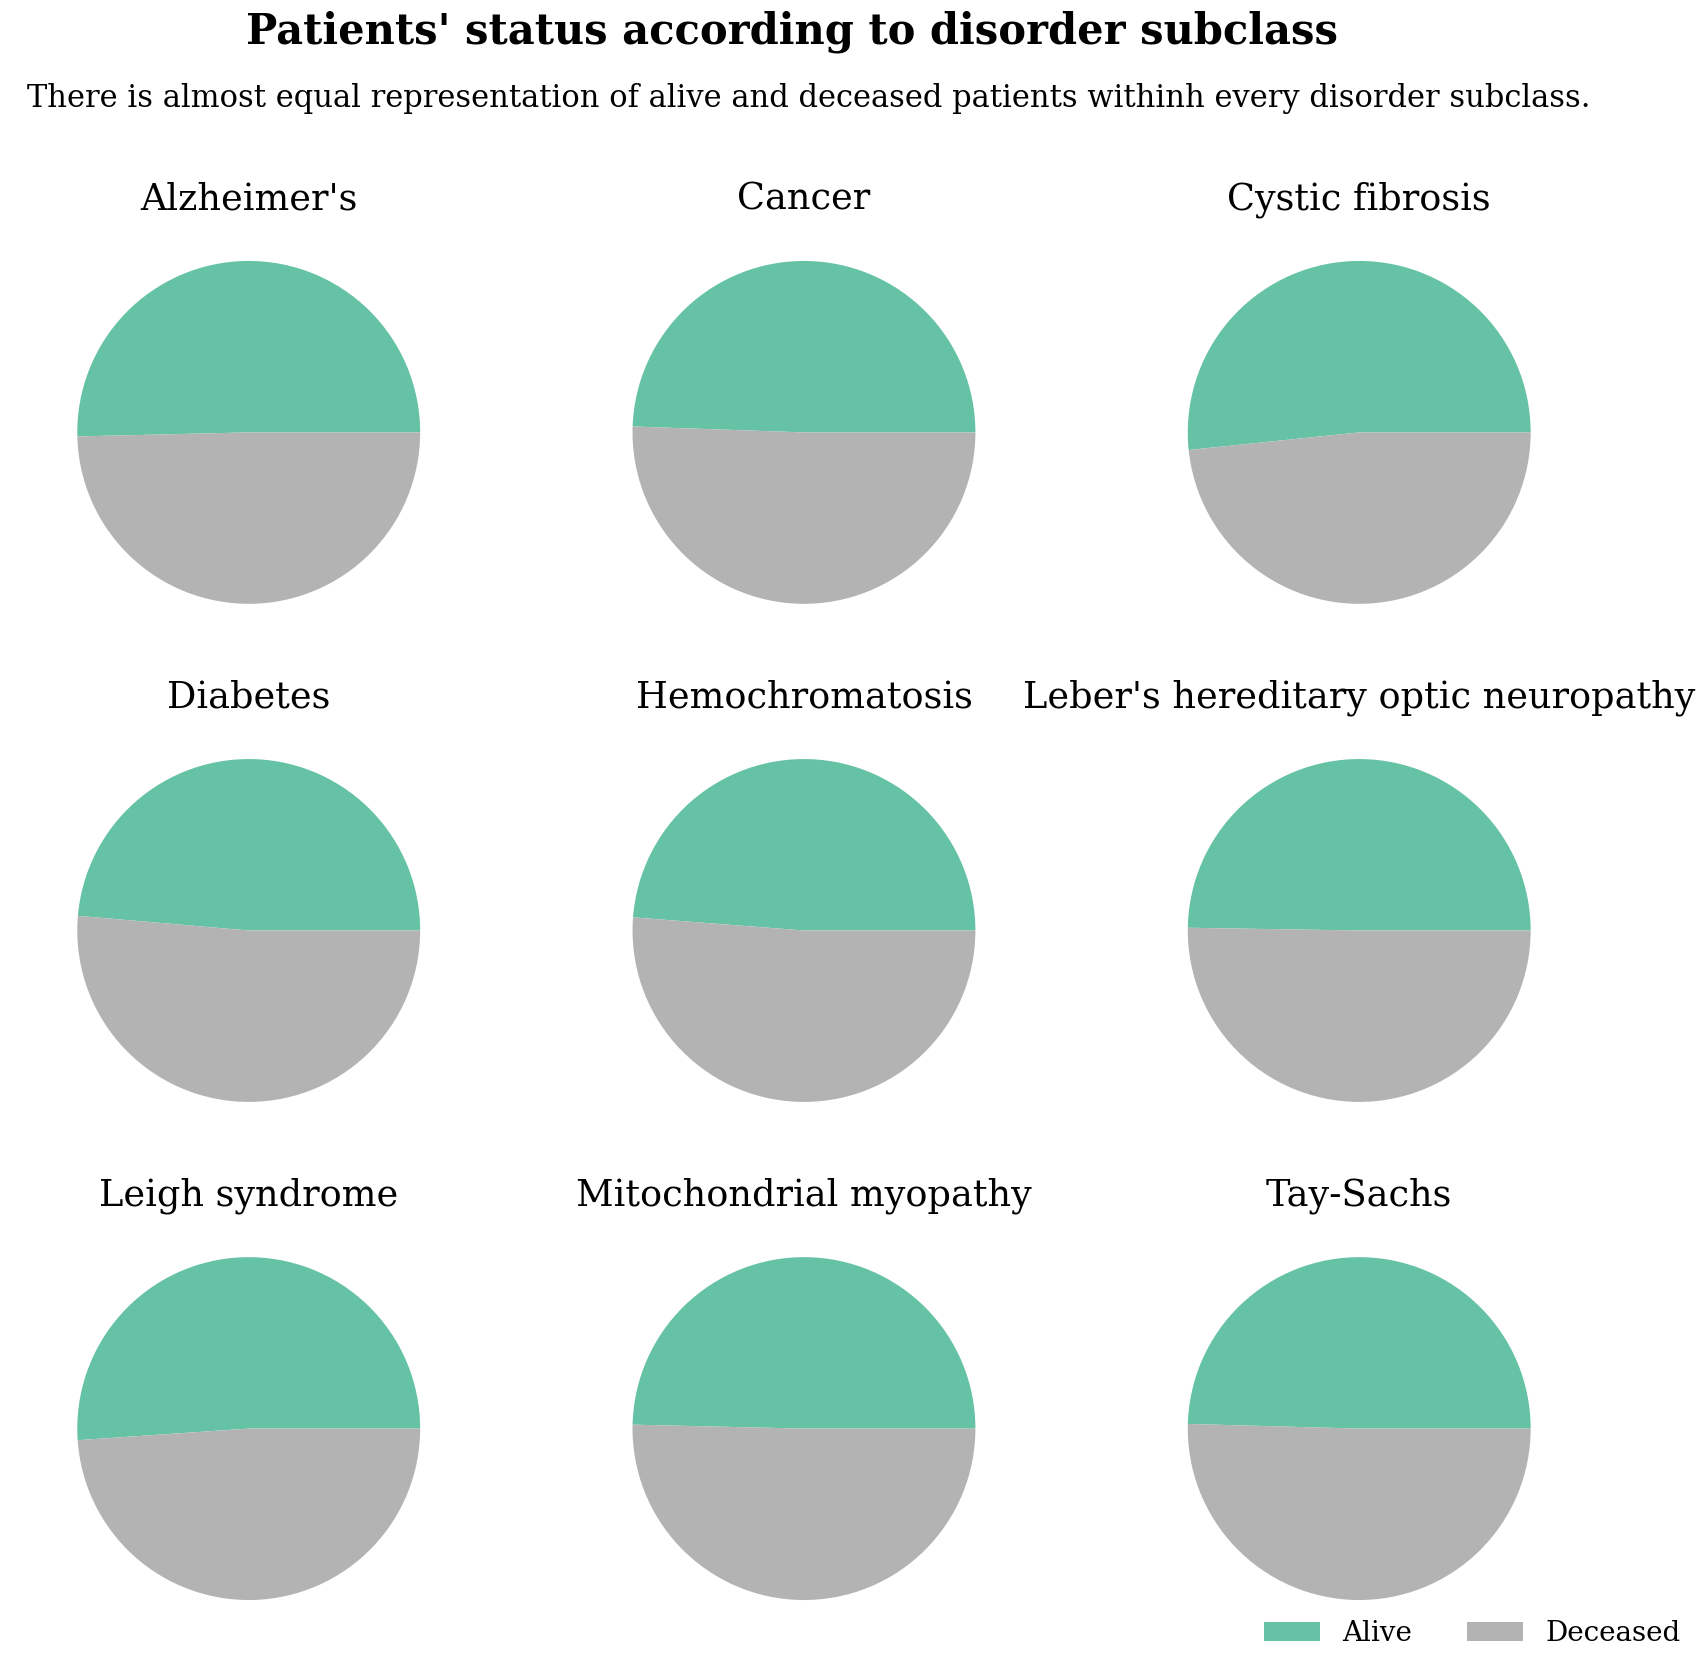

In [25]:
fig,axes = plt.subplots(nrows=3,ncols=3, figsize=(17,17))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 22


genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Alzheimer's"]['Status'].value_counts().sort_index().plot.pie(ax=axes[0,0],title="Alzheimer's",rot=0,fontsize=20, ylabel=' ', colormap = 'Set2', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Cancer"]['Status'].value_counts().sort_index().plot.pie(ax=axes[0,1], title="Cancer",rot=0,fontsize=20, ylabel=' ', colormap = 'Set2', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Cystic fibrosis"]['Status'].value_counts().sort_index().plot.pie(ax=axes[0,2], title="Cystic fibrosis",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Diabetes"]['Status'].value_counts().sort_index().plot.pie(ax=axes[1,0], title="Diabetes",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Hemochromatosis"]['Status'].value_counts().sort_index().plot.pie(ax=axes[1,1], title="Hemochromatosis",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Leber's hereditary optic neuropathy"]['Status'].value_counts().sort_index().plot.pie(ax=axes[1,2],title="Leber's hereditary optic neuropathy",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Leigh syndrome"]['Status'].value_counts().sort_index().plot.pie(ax=axes[2,0],title="Leigh syndrome",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Mitochondrial myopathy"]['Status'].value_counts().sort_index().plot.pie(ax=axes[2,1],title="Mitochondrial myopathy",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Tay-Sachs"]['Status'].value_counts().sort_index().plot.pie(ax=axes[2,2],title="Tay-Sachs",rot=0,fontsize=20, colormap = 'Set2', ylabel=' ', labeldistance=None)
fig.suptitle("Patients' status according to disorder subclass\n\n", fontsize=30, fontweight='bold', ha='center') 
fig.tight_layout()
fig.text(0.05,0.86,'There is almost equal representation of alive and deceased patients withinh every disorder subclass.\n\n\n',fontsize=22, fontfamily='serif')
fig.legend(['Alive', 'Deceased'], loc='lower right', frameon=False, fontsize=20, ncol=2)


fig.show()

# Occurence of specific symptoms according to disorder subclass

In [26]:
hemo = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=="Hemochromatosis"][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0:'Hemochromatosis'})
leber = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=="Leber's hereditary optic neuropathy"][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : "Leber's hereditary optic neuropathy"})
diabetes = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=='Diabetes'][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : 'Diabetes'})
leigh = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=='Leigh syndrome'][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : 'Leigh syndrome'})
cancer = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=='Cancer'][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : 'Cancer'})
cystic = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=='Cystic fibrosis'][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : 'Cystic fibrosis'})
tay = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=='Tay-Sachs'][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : 'Tay-Sachs'})
mitomyo = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=='Mitochondrial myopathy'][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : 'Mitochondrial myopathy'})
alzh = (genetics_train_transformed[genetics_train_transformed['Disorder_subclass']=="Alzheimer's"][['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']]==1).sum().to_frame().rename(columns={0 : "Alzheimer's"})

symptom_wise = pd.concat([hemo,leber,diabetes,leigh,cancer,cystic,tay,mitomyo,alzh], axis=1).transpose()
symptom_wise

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
Hemochromatosis,538,440,378,180,132
Leber's hereditary optic neuropathy,507,514,516,499,500
Diabetes,1301,1320,1379,1214,1252
Leigh syndrome,2912,2811,2729,2071,1918
Cancer,22,15,22,2,1
Cystic fibrosis,2323,2299,2348,2055,2066
Tay-Sachs,1307,1108,1041,646,465
Mitochondrial myopathy,2299,2070,1871,1435,1173
Alzheimer's,117,124,128,122,124


Text(-0.8, 3200, 'All of the symptoms appear in all of the disorders subclasses.Generally symptoms 1,2 and 3\n                                 are more common than symptoms 4 and 5.\n')

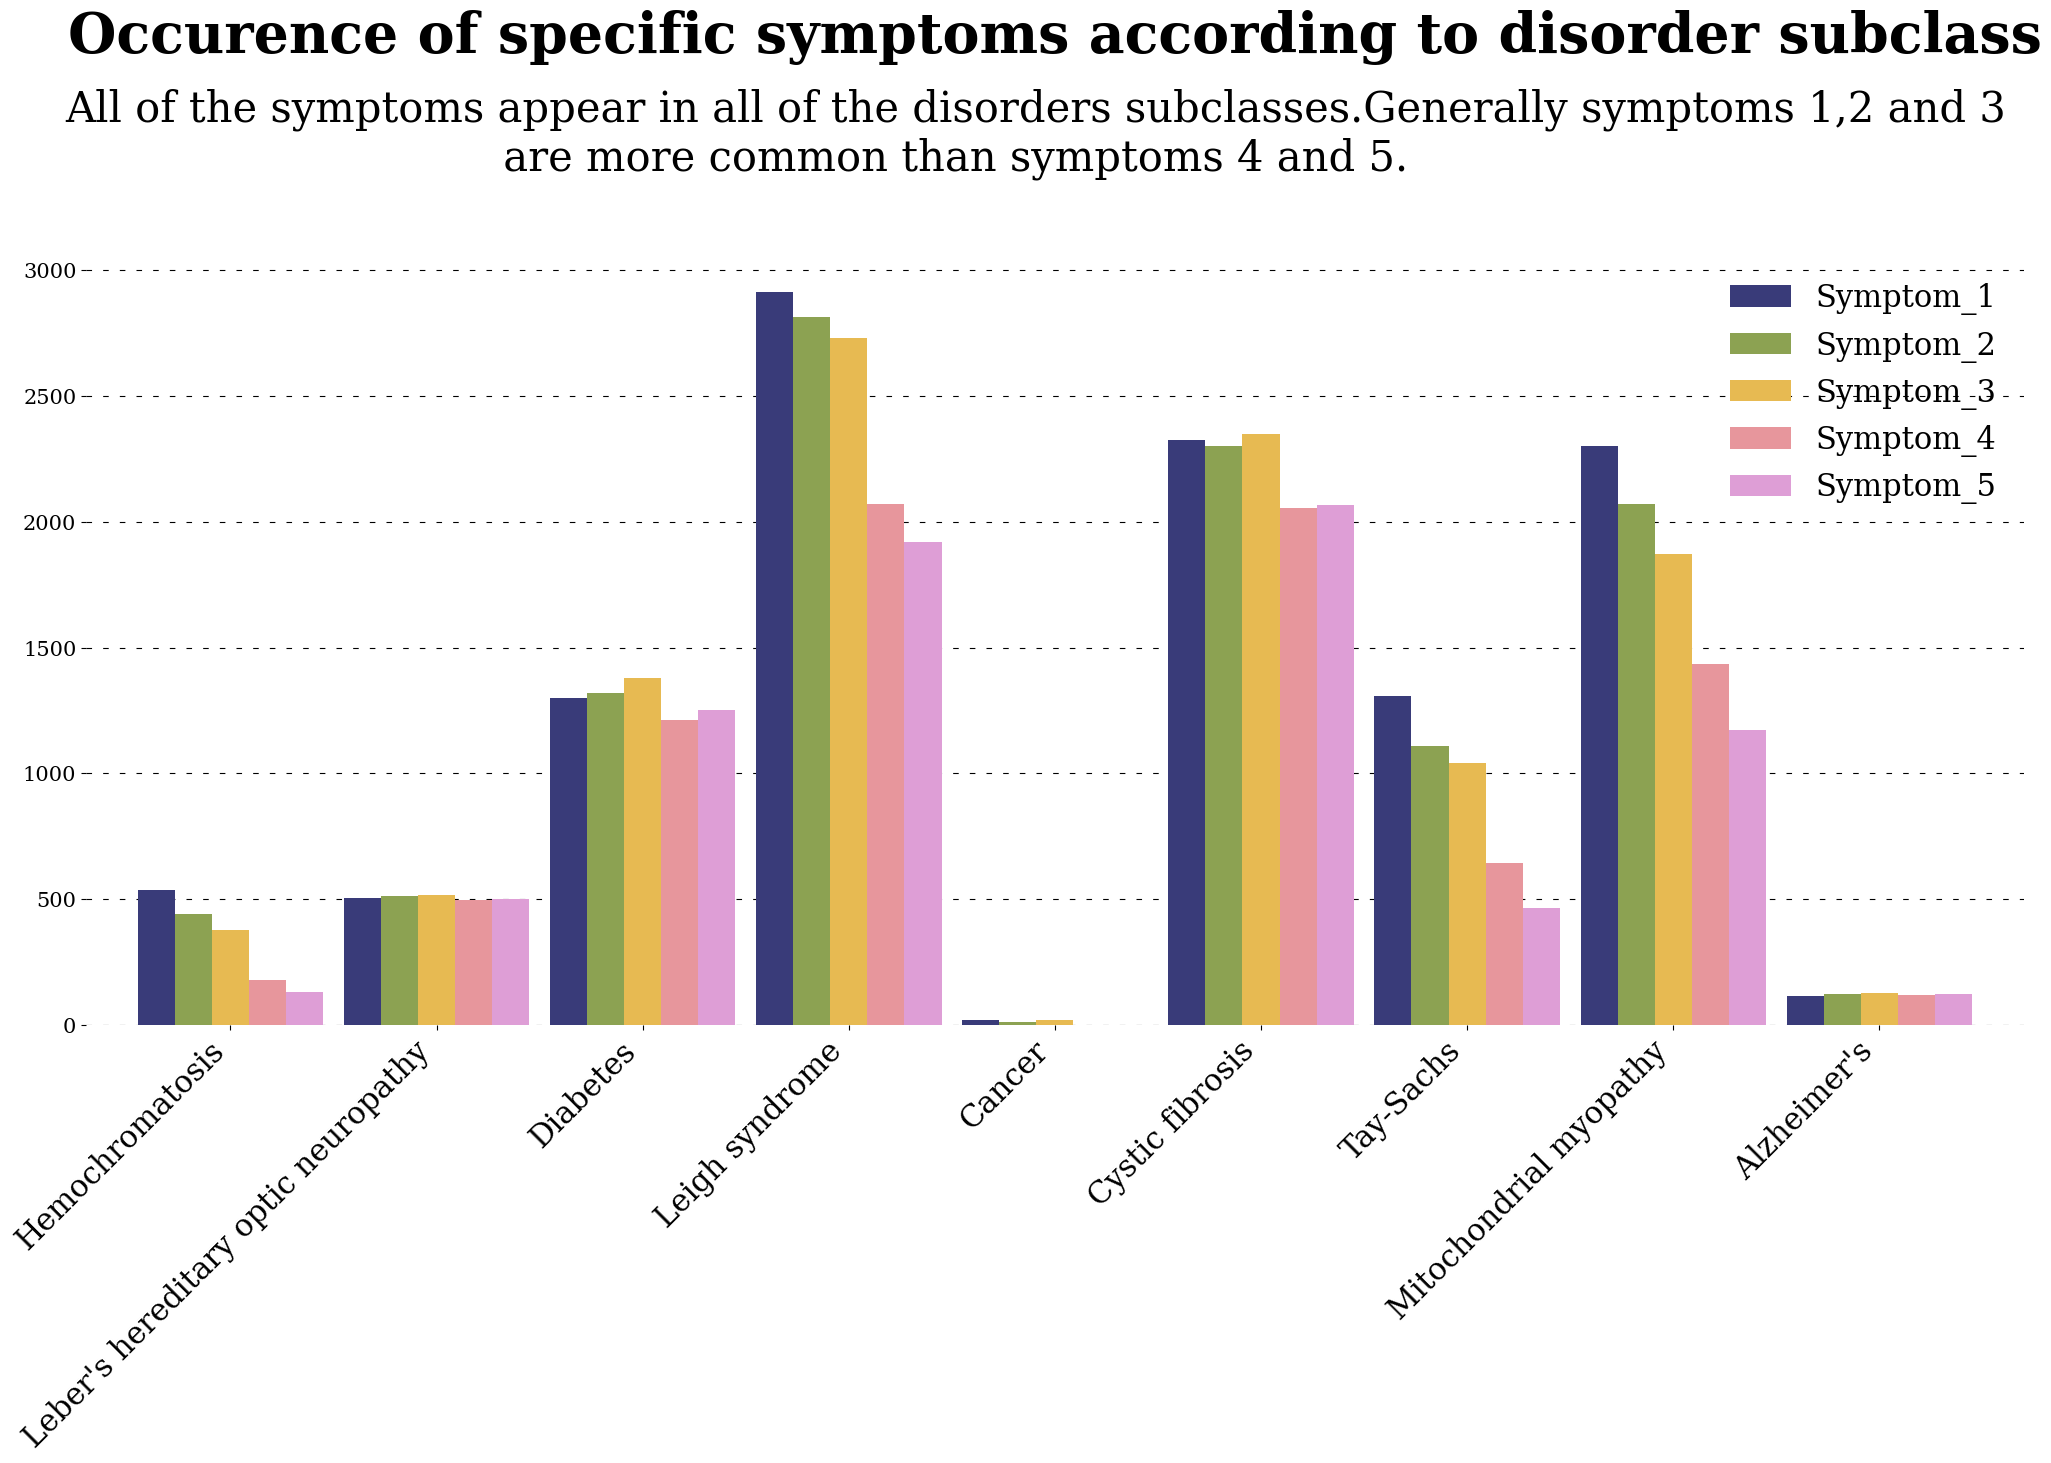

In [27]:
plt.rcParams['figure.frameon']= False
symptom_wise.plot.bar(figsize=(25,10),colormap = 'tab20b', fontsize=15,width=0.9,zorder=2)
plt.title('Occurence of specific symptoms according to disorder subclass\n\n\n', fontsize=40,fontweight='bold',ha='center')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize=22,
)
plt.grid(color='black', linestyle=':', axis='y', zorder=1,  dashes=(5,10))
plt.box(False)
plt.legend(loc='best',frameon=False)    
plt.text(-0.8,3200,'All of the symptoms appear in all of the disorders subclasses.Generally symptoms 1,2 and 3\n\
                                 are more common than symptoms 4 and 5.\n',fontsize=30, fontfamily='serif')
        

# Presence of defective maternal and parental genes according to disorder subclass

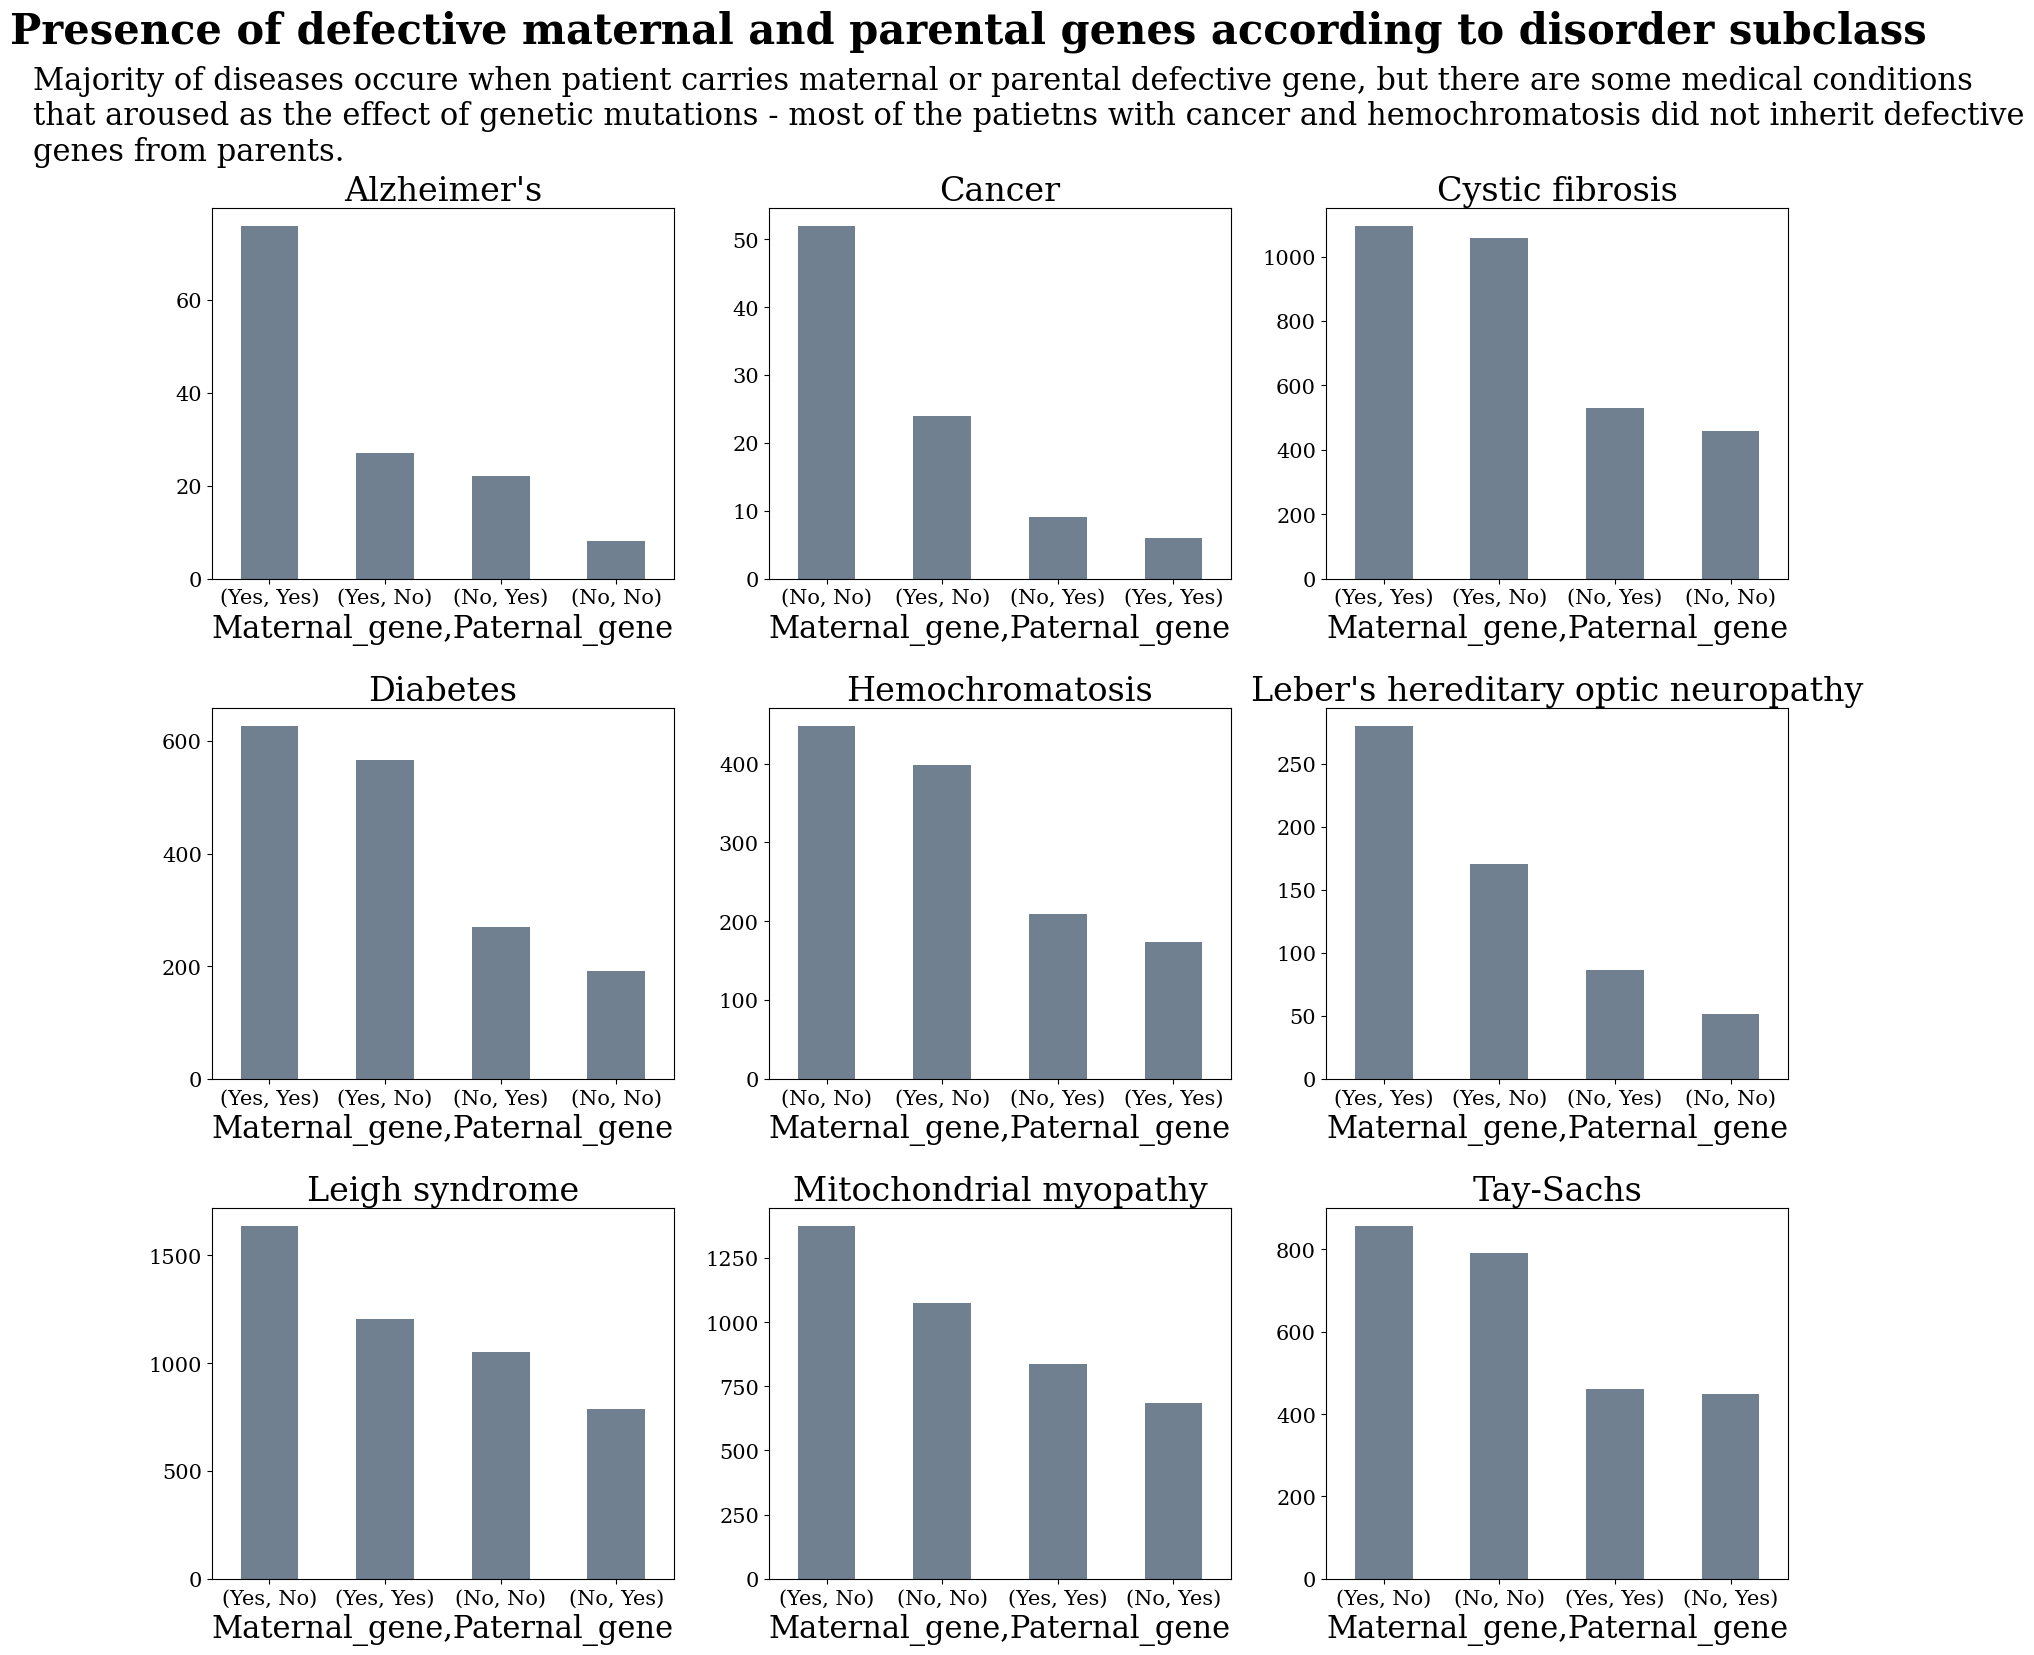

In [28]:
fig,axes = plt.subplots(nrows=3,ncols=3, figsize=(17,17))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20

genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Alzheimer's"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[0,0],title="Alzheimer's",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Cancer"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[0,1], title="Cancer",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Cystic fibrosis"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[0,2], title="Cystic fibrosis",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Diabetes"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[1,0], title="Diabetes",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Hemochromatosis"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[1,1], title="Hemochromatosis",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Leber's hereditary optic neuropathy"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[1,2],title="Leber's hereditary optic neuropathy",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Leigh syndrome"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[2,0],title="Leigh syndrome",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Mitochondrial myopathy"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[2,1],title="Mitochondrial myopathy",rot=0,fontsize=15, color='slategray')
genetics_train_transformed.loc[genetics_train_transformed['Disorder_subclass']=="Tay-Sachs"][['Maternal_gene','Paternal_gene']].value_counts().plot.bar(ax=axes[2,2],title="Tay-Sachs",rot=0,fontsize=15, color='slategray')
fig.suptitle('Presence of defective maternal and parental genes according to disorder subclass\n\n', fontsize=30, fontweight='bold', ha='center') 
fig.tight_layout()
fig.text(-0.05,0.87,'Majority of diseases occure when patient carries maternal or parental defective gene, but there are some medical conditions\n\
that aroused as the effect of genetic mutations - most of the patietns with cancer and hemochromatosis did not inherit defective\n\
genes from parents.\n',fontsize=22, fontfamily='serif')


fig.show()

# Looking for more correlations

To get full insight into correlations between features all categorical features need to be change for numerical features.

In [29]:
# transforming categorical features with LabelEncoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feature in categorical_features:
    le.fit(genetics_train_transformed[feature])
    genetics_train_transformed[feature] = le.transform(genetics_train_transformed[feature])

In [30]:
for feature in target:
    le.fit(genetics_train_transformed[feature])
    genetics_train_transformed[feature] = le.transform(genetics_train_transformed[feature])

In [31]:
for feature in categorical_features:
    le.fit(genetics_test_transformed[feature])
    genetics_test_transformed[feature] = le.transform(genetics_test_transformed[feature])

In [32]:
genetics_train_transformed.corr()

,Patient_age,Blood_cell_count,Mothers_age,Fathers_age,Previous_abortions,White_blood_cell_count,Genes_mother_side,Inherited_father,Maternal_gene,Paternal_gene,...,Birth_defects,Blood_test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,index,Genetic_disorder,Disorder_subclass
Patient_age,1.000000,0.005707,-0.005545,-0.008181,-0.006611,-0.007273,0.001640,-0.001290,0.000024,0.001895,...,0.006906,0.004189,0.003124,0.004666,-0.014811,-0.010445,-0.011933,0.011252,0.003957,0.010996
Blood_cell_count,0.005707,1.000000,-0.003645,0.003289,-0.006966,-0.000111,-0.003078,-0.009621,0.008455,-0.010800,...,0.009773,0.006472,0.005784,0.003741,0.005261,0.008299,0.005993,0.002261,0.007009,-0.000752
Mothers_age,-0.005545,-0.003645,1.000000,0.001414,0.013889,0.014581,0.009685,-0.004329,0.015213,-0.000162,...,0.006641,0.003938,-0.009267,-0.009935,0.005094,-0.006679,0.006136,0.010059,0.002249,-0.003978
Fathers_age,-0.008181,0.003289,0.001414,1.000000,-0.000878,0.015923,-0.008888,0.001870,-0.012196,-0.000765,...,0.007158,-0.005714,-0.000995,-0.001912,0.008941,-0.001266,0.009244,-0.009475,0.007365,-0.006816
Previous_abortions,-0.006611,-0.006966,0.013889,-0.000878,1.000000,0.005497,0.004155,0.013927,-0.005022,0.003394,...,-0.001536,-0.000150,-0.011084,0.004510,-0.005693,0.006354,0.003628,0.002317,-0.011470,-0.007807
White_blood_cell_count,-0.007273,-0.000111,0.014581,0.015923,0.005497,1.000000,0.002180,0.000145,0.004071,0.009338,...,-0.013576,0.004237,-0.004860,0.006919,0.009120,0.000278,-0.003759,0.006035,0.005428,-0.008376
Genes_mother_side,0.001640,-0.003078,0.009685,-0.008888,0.004155,0.002180,1.000000,0.009232,0.093412,-0.016847,...,-0.003875,0.001285,-0.002365,0.002969,0.011415,0.009163,0.009467,0.004358,-0.004058,-0.128750
Inherited_father,-0.001290,-0.009621,-0.004329,0.001870,0.013927,0.000145,0.009232,1.000000,0.010372,0.096749,...,-0.004048,-0.008493,-0.006336,0.001923,0.009948,0.005586,0.017995,-0.010919,-0.011056,-0.122450
Maternal_gene,0.000024,0.008455,0.015213,-0.012196,-0.005022,0.004071,0.093412,0.010372,1.000000,0.012886,...,-0.005208,0.001685,0.004135,0.011119,0.012233,0.010397,0.013301,-0.005173,-0.008322,-0.107187
Paternal_gene,0.001895,-0.010800,-0.000162,-0.000765,0.003394,0.009338,-0.016847,0.096749,0.012886,1.000000,...,-0.001352,-0.010031,0.014072,0.006655,-0.006052,0.009185,0.009387,-0.007636,0.004207,-0.111322


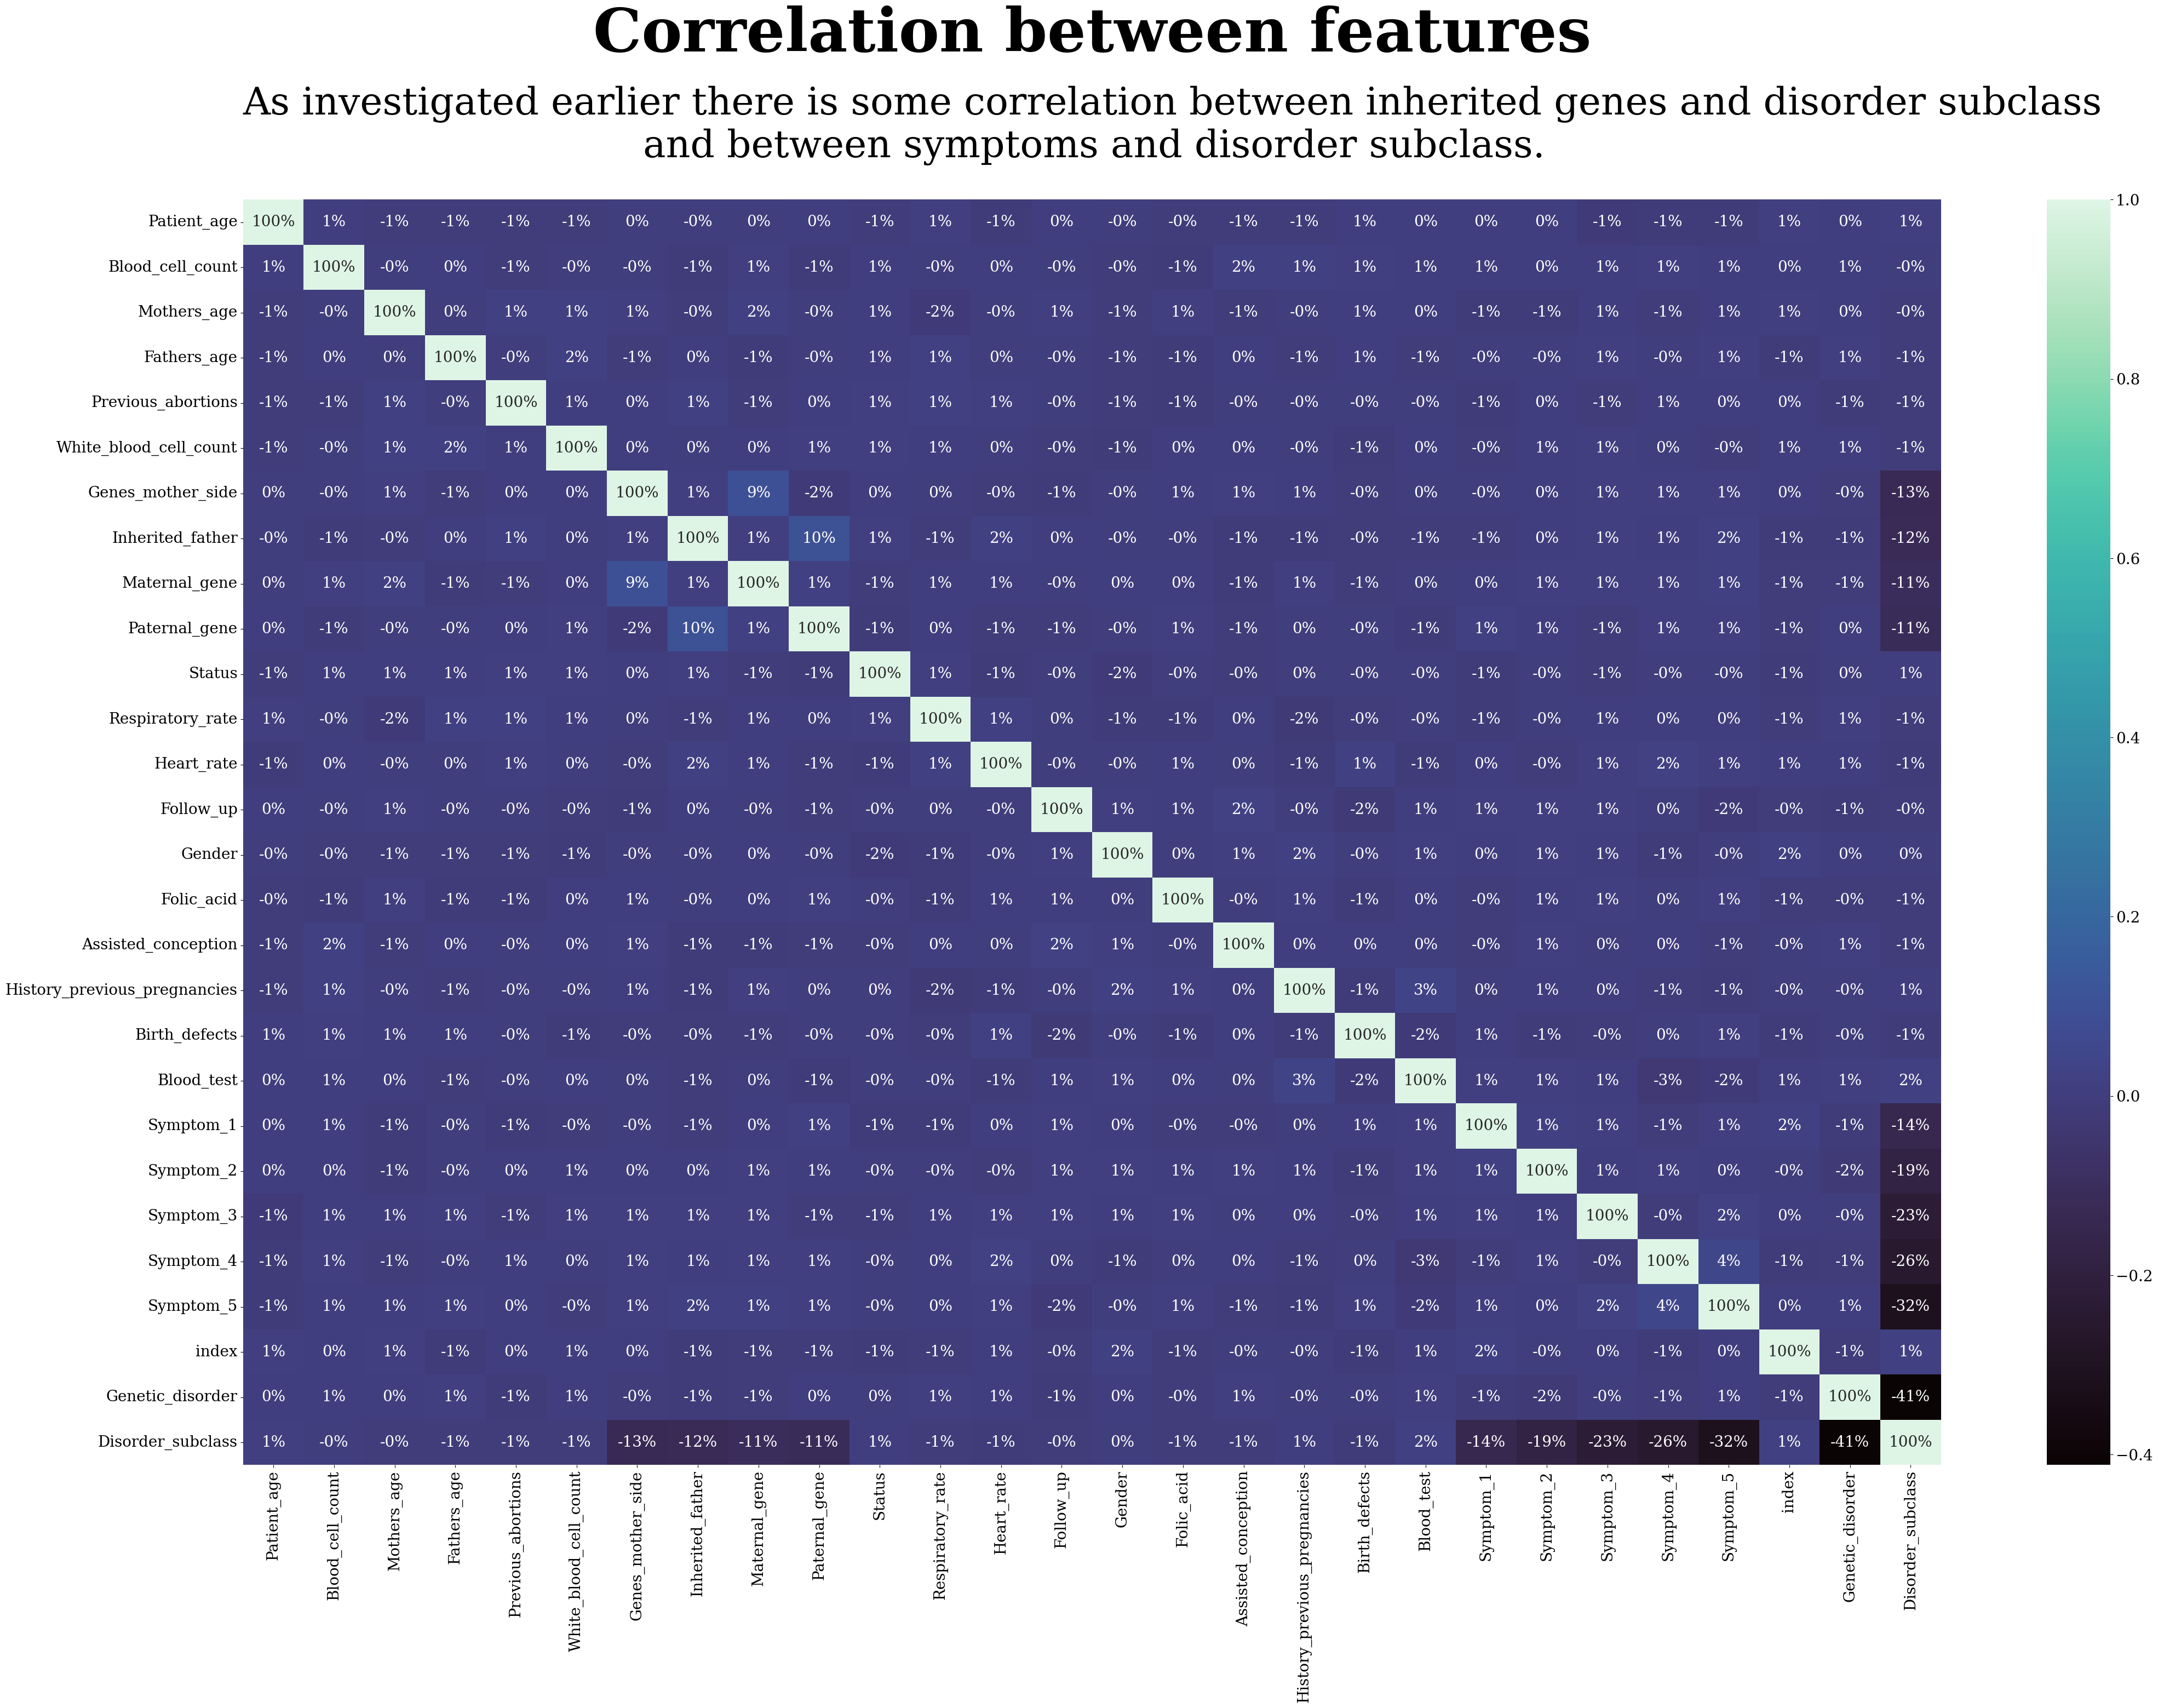

In [33]:
plt.figure(figsize=(50,30))
sns.heatmap(genetics_train_transformed.corr(),annot=True,fmt=".0%", cmap='mako')
plt.title('Correlation between features\n\n',fontsize=80, fontweight='bold', ha='center')
plt.text(0,0,'As investigated earlier there is some correlation between inherited genes and disorder subclass\n\
                                 and between symptoms and disorder subclass.\n',fontsize=50, fontfamily='serif')
plt.show()

# Modeling

In [34]:
# Packages

# data preparation 
from sklearn.model_selection import train_test_split  #splitting data
from sklearn.preprocessing import OneHotEncoder       #
from sklearn.preprocessing import StandardScaler      #scaling data

# models
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression   
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable

# cross validation
from sklearn.model_selection import GridSearchCV

# models evaluation
from sklearn.metrics import confusion_matrix          
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [35]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(genetics_train_transformed[numeric_features+categorical_features], genetics_train_transformed[target], test_size=0.30, random_state=0, stratify=genetics_train_transformed[target])
print ('Train observations: %d\nTest observations: %d' % (X_train.shape[0], X_test.shape[0]))

Train observations: 12632
Test observations: 5415


In [36]:
results = PrettyTable(['Model',
                       'Score'
                       ])

# Logistic Regression

In [37]:
numeric_transformer = Pipeline(steps=[
    ('standardscaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('log_reg', MultiOutputClassifier(LogisticRegression()) 
                                )])

# cross validation and training


grid_param_log_reg = {'log_reg__estimator__C' : [0.5,1]}
log_reg_gridsearch = GridSearchCV(final_pipeline,
                             grid_param_log_reg,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)

log_reg_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', log_reg_gridsearch.best_params_)
log_reg_model = log_reg_gridsearch.best_estimator_


Best hyperparameter: {'log_reg__estimator__C': 0.5}


In [38]:
results.add_row(['Logistic Regression MultiOutput', log_reg_model.score(X_test,y_test)])

0.24930747922437674

# K Neighbor Classifier

In [40]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])



final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('knc', MultiOutputClassifier(KNeighborsClassifier()) 
                                )])

# cross validation and training


grid_param_knc = {'knc__estimator__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knc_reg_gridsearch = GridSearchCV(final_pipeline,
                             grid_param_knc,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)

knc_reg_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', knc_reg_gridsearch.best_params_)
knc_model = knc_reg_gridsearch.best_estimator_


Best hyperparameter: {'knc__estimator__n_neighbors': 1}


In [47]:
results.add_row(['K Neighbor MultiOutput', knc_model.score(X_test,y_test)])

# Decision Tree Classifier

In [42]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])



final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('dtc', MultiOutputClassifier(DecisionTreeClassifier()) 
                                )])

# cross validation and training


grid_param_dtc = {'dtc__estimator__max_depth' : [3, 5, 10, 15, 20],
                  'dtc__estimator__min_samples_leaf':[3, 5, 10, 15]}
dtc_reg_gridsearch = GridSearchCV(final_pipeline,
                             grid_param_dtc,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)

dtc_reg_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', dtc_reg_gridsearch.best_params_)
dtc_model = dtc_reg_gridsearch.best_estimator_


Best hyperparameter: {'dtc__estimator__max_depth': 3, 'dtc__estimator__min_samples_leaf': 3}


In [48]:
results.add_row(['Decision Tree MultiOutput', dtc_model.score(X_test,y_test)])

# Random Forest Classifier

In [44]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])



final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('rfc', MultiOutputClassifier(RandomForestClassifier(n_estimators=1000)) 
                                )])

# cross validation and training


grid_param_rfc = {
                  'rfc__estimator__max_depth':[3, 5, 10, 20],
                  'rfc__estimator__min_samples_leaf':[3, 5, 10, 15]}
rfc_reg_gridsearch = GridSearchCV(final_pipeline,
                             grid_param_rfc,
                             scoring='f1_macro',
                             cv=10,
                             n_jobs=-1)
rfc_reg_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rfc_reg_gridsearch.best_params_)
rfc_model = rfc_reg_gridsearch.best_estimator_


Best hyperparameter: {'rfc__estimator__max_depth': 3, 'rfc__estimator__min_samples_leaf': 3}


In [49]:
results.add_row(['Random Forest MultiOutput', rfc_model.score(X_test,y_test)])

In [50]:
results

Model,Score
Logistic Regression MultiOutput,0.24930747922437674
K Neighbor MultiOutput,0.2808864265927978
Decision Tree MultiOutput,0.24598337950138505
Random Forest MultiOutput,0.2729455216989843
